
# Task3: Exploratory Data Analysis - Retail

# By:Sayed Mahmoud 

## Table of Contents
<ul>
<li><a href="#intro">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Data Wrangling

In [1]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolor
import seaborn as sns
%matplotlib inline

In [2]:
#import data
df=pd.read_csv('SampleSuperstore.csv')

In [3]:
#show data
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
#statistical information about data
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
#check for duplicate
df.duplicated().sum()

17

In [7]:
#remove duplicate
df.drop_duplicates(inplace=True)
#check for duplicates again
df.duplicated().sum()

0

In [8]:
#check for null values
df.isnull().sum().sum()

0

In [9]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [10]:
#we notice that Postal Code is integer datatype so we will change it 
df['Postal Code']=df['Postal Code'].to_string()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   object 
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ MB


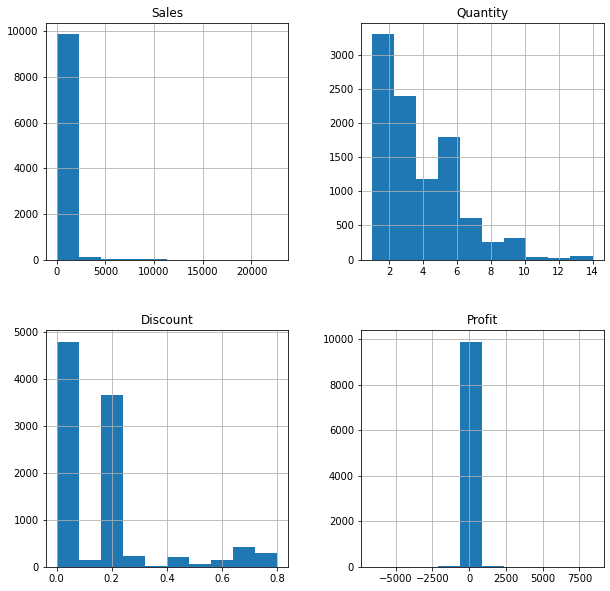

In [12]:
df.hist(figsize=(10,10));

As Postal Code we don't need it and it will make errors with code as its too large unique records we will delete it 

In [64]:
df.drop(labels=['Postal Code'],axis=1,inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

### What is Highest and Lowest Sales in Each feature

In [65]:
# get only numeric data 
numerical = [i for i in df.columns if (df[i].dtype in ['int64' , 'float64']) and (df[i].nunique() > 2)  ]
# get categoral data
categoral = [i for i in df.columns if (df[i].dtype == 'object') and (df[i].nunique() < 50)]

In [66]:
# numerical
sns.set()
def n_plot():
    for i in numerical:
        plt.subplots(1,2,figsize=(15,6))
        plt.subplot(1,2,1)
        plt.hist(df[i])
        plt.title(i);
        plt.subplot(1,2,2)
        sns.boxplot(data=df[i])
        plt.title(i);
        yield()

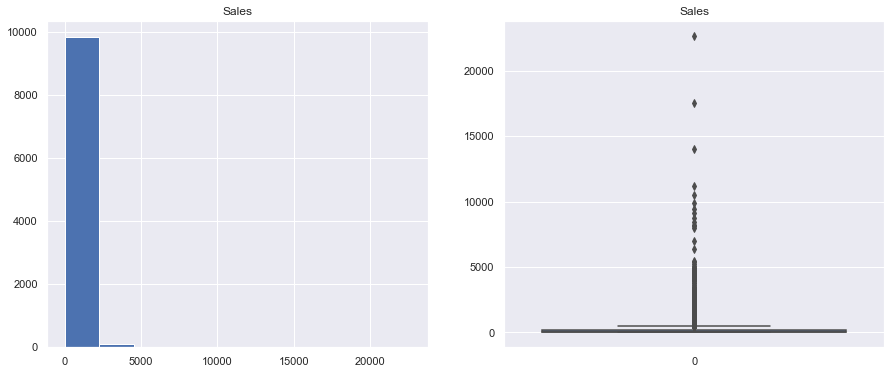

In [67]:
my_plot = n_plot()
next(my_plot);

#### Sales has alot of outliers we cann't conclude what happens

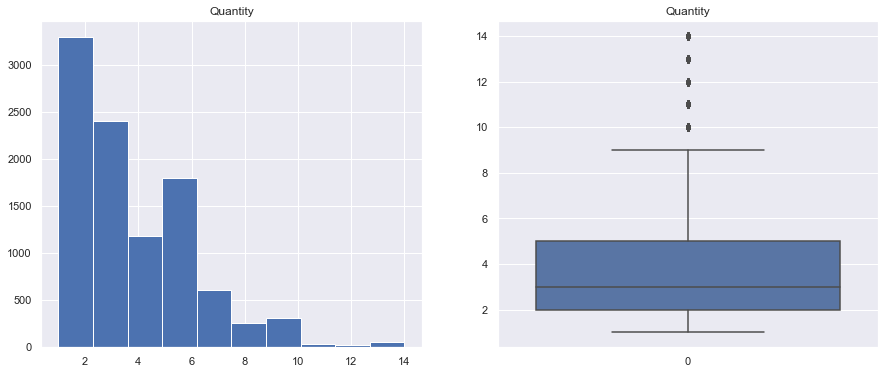

In [68]:
next(my_plot);

#### The quantity box plot indicates Less quantity, more sale

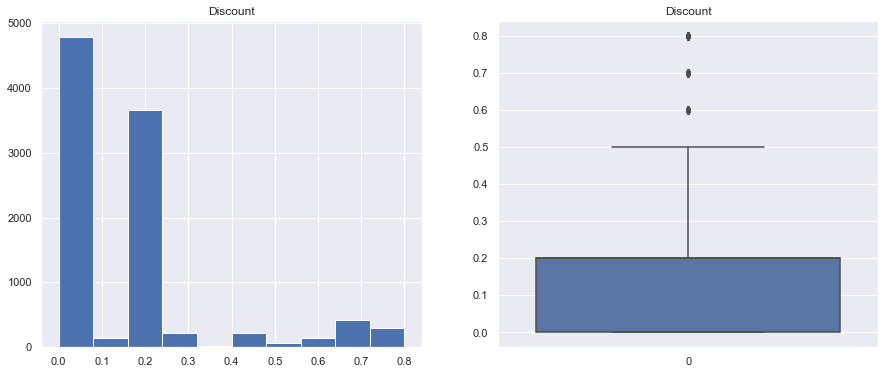

In [69]:
next(my_plot);

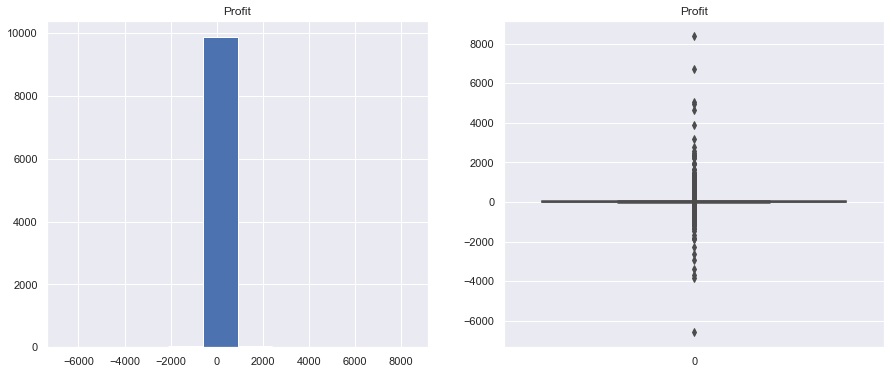

In [70]:
next(my_plot);

#### We cannot conclude any thing from the box plot of profit as the mean is too small and the standard deviation is too big so it appear that only outliers 

In [71]:
def c_plot():
    for i in categoral:
        plt.figure(figsize = [16,6])
        sns.countplot(data = df , x = i , order =  df[i].value_counts(ascending = False).index);
        plt.title(i)
        plt.xticks(rotation = 90);
        yield()
#categoral

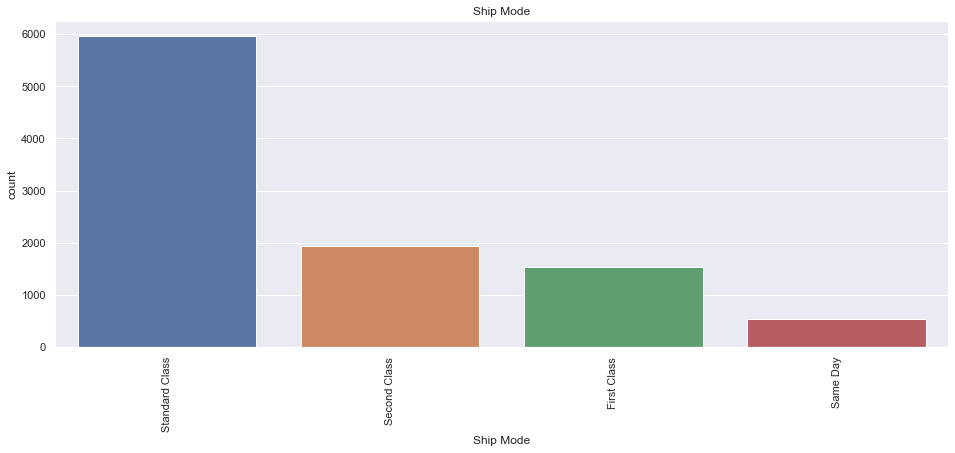

In [72]:
my_plot =c_plot()
next(my_plot);

#### We see that Standard Class has the largest sell while the same Day is the lowest

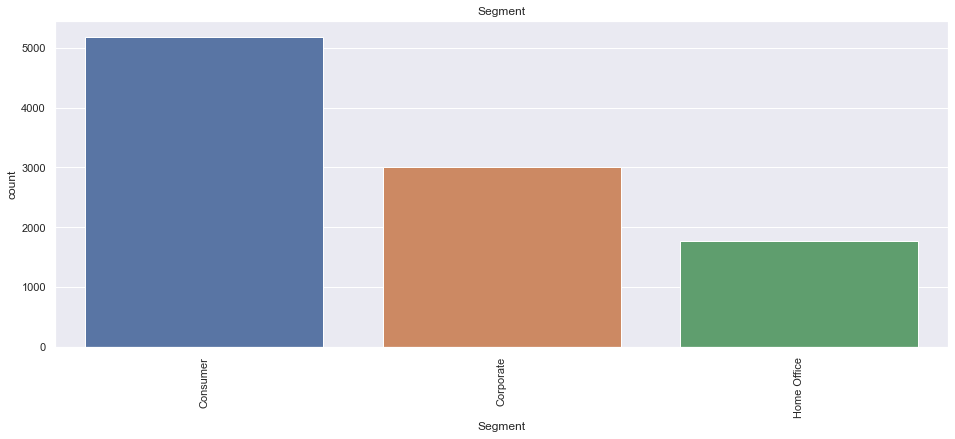

In [73]:
next(my_plot);

#### The consumer is the most purchaser of merchandise

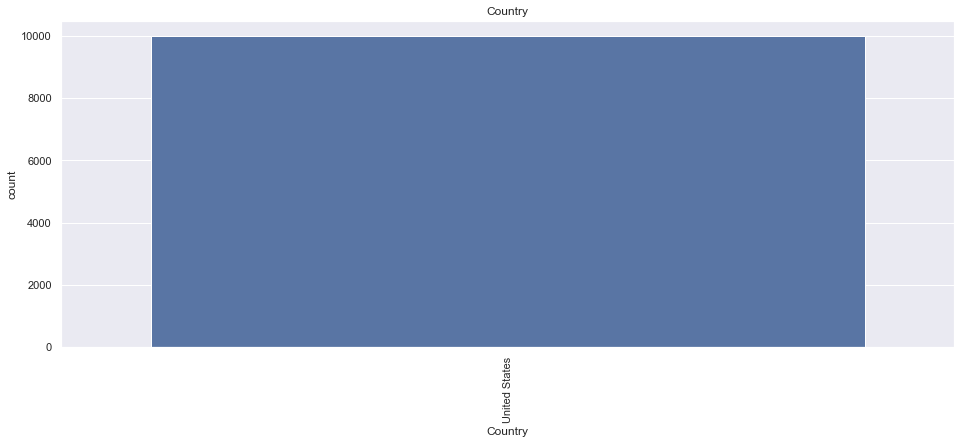

In [74]:
next(my_plot);

#### We have only one country and it is called United States

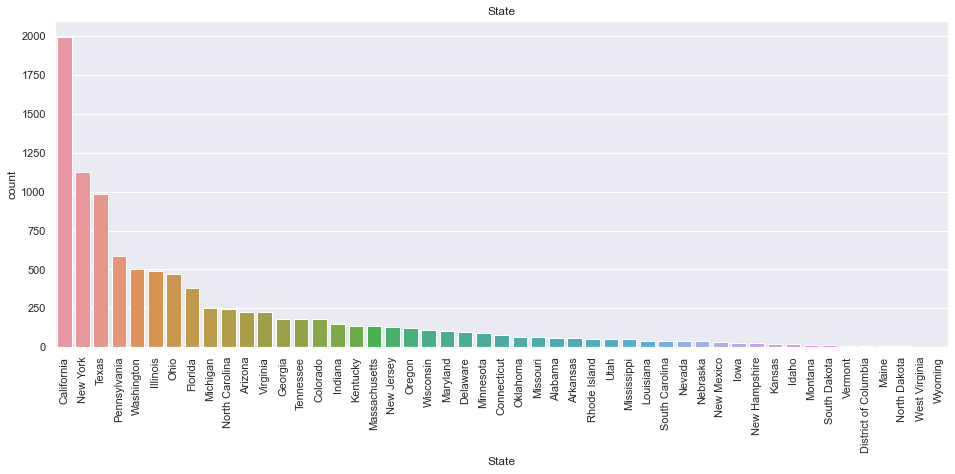

In [75]:
next(my_plot);

##### There are so many unique state in state columns and The Highest `Profit` is in `California` while in `Wyoming` is the lowest

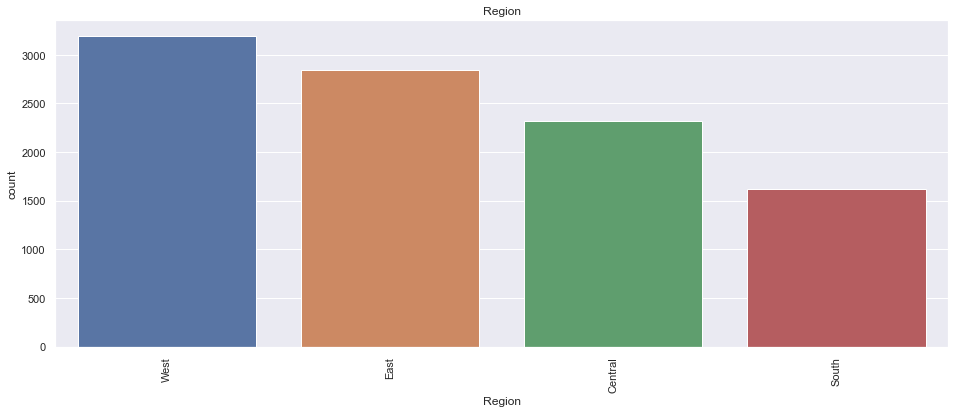

In [76]:
next(my_plot);

##### There are four Regions The Most popular is The West Region unless West and East is too close to each other while the lowest is the South 

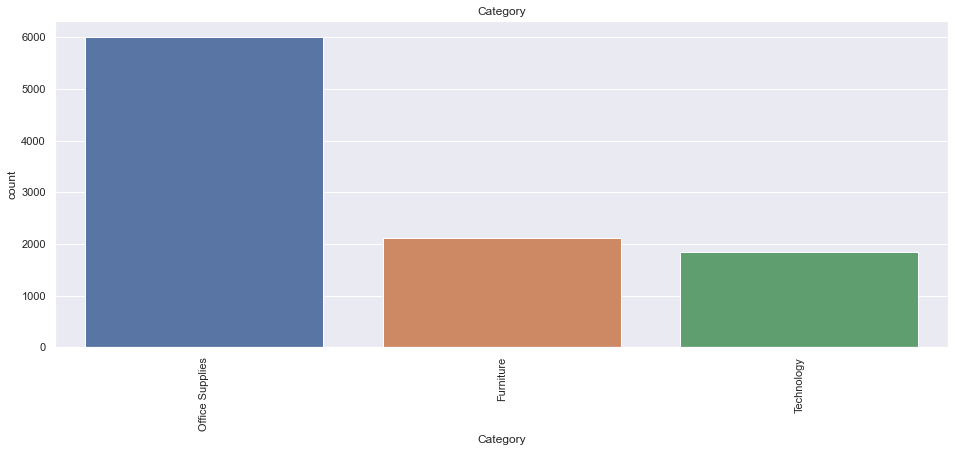

In [77]:
next(my_plot);

#### There are three Category of goods The largest sell Category is Office Supplies 
#### Technology is The lowest and Furniture is close to it 

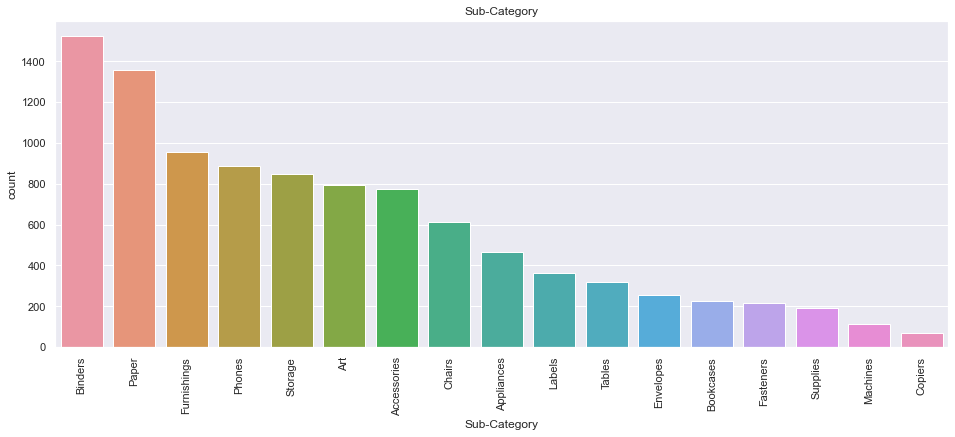

In [78]:
next(my_plot);

#### There are 17 Sub-Category Blinders and Paper has the most sells while the lowest is Copiers

### Correlation Between Features

Let's see the Correlation between features 

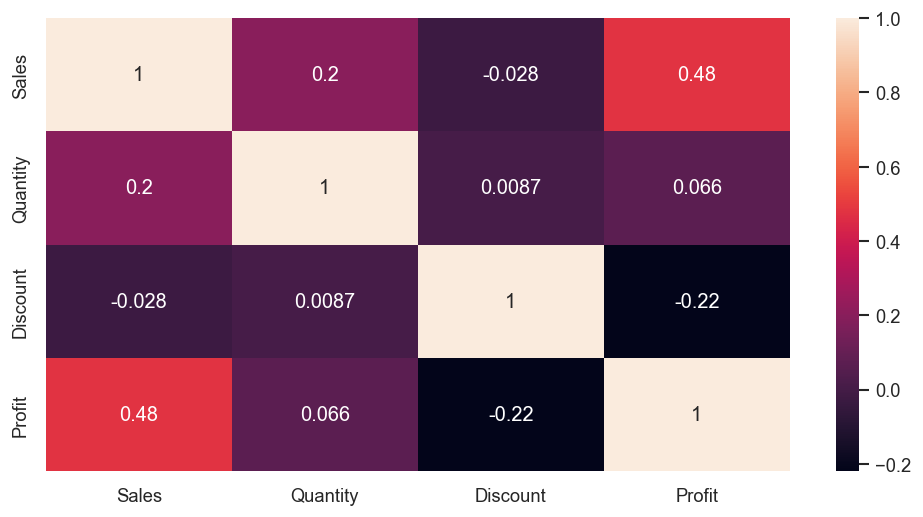

In [79]:
plt.figure(figsize=(10,5), dpi = 120)
sns.heatmap(df.corr() , annot = True);

#### From the heatmap we can say that :
>`Sales` and `Profit` Has a high correlation compared by others 

### Correlation between `Sales` and `Profit` about each Category

In [117]:
def scat():
    for i in categoral:
        #as state has too many unique items the scatter plot will not define any thing
        if i == 'State':
            continue
        plt.figure(figsize=(10,5), dpi = 120)
        sns.scatterplot(data = df , x = 'Sales' , y = "Profit" , hue = i);
        plt.title(i)
        plt.legend()
        plt.show();
        yield()

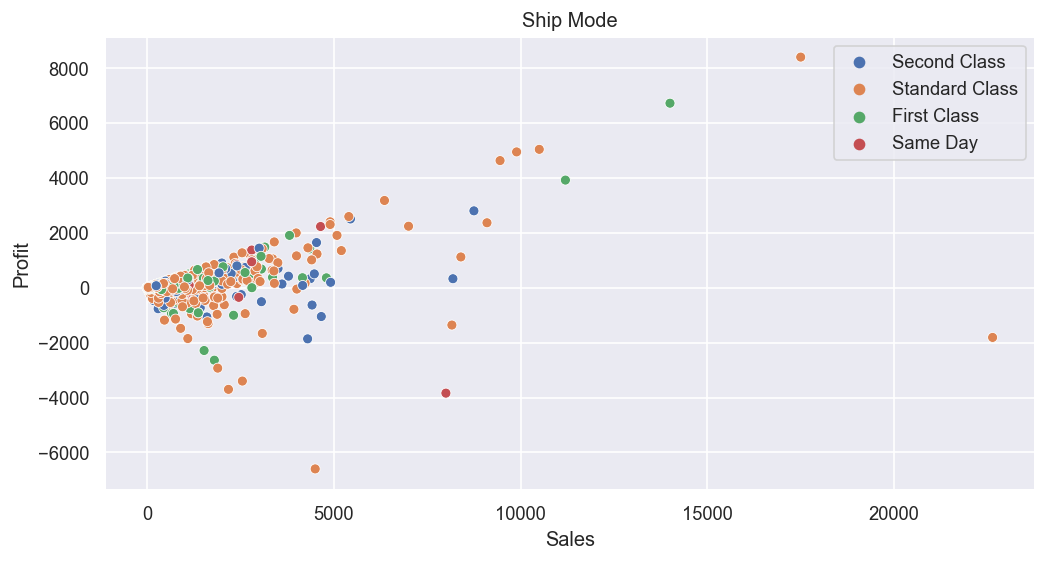

In [118]:
scate=scat()
next(scate);

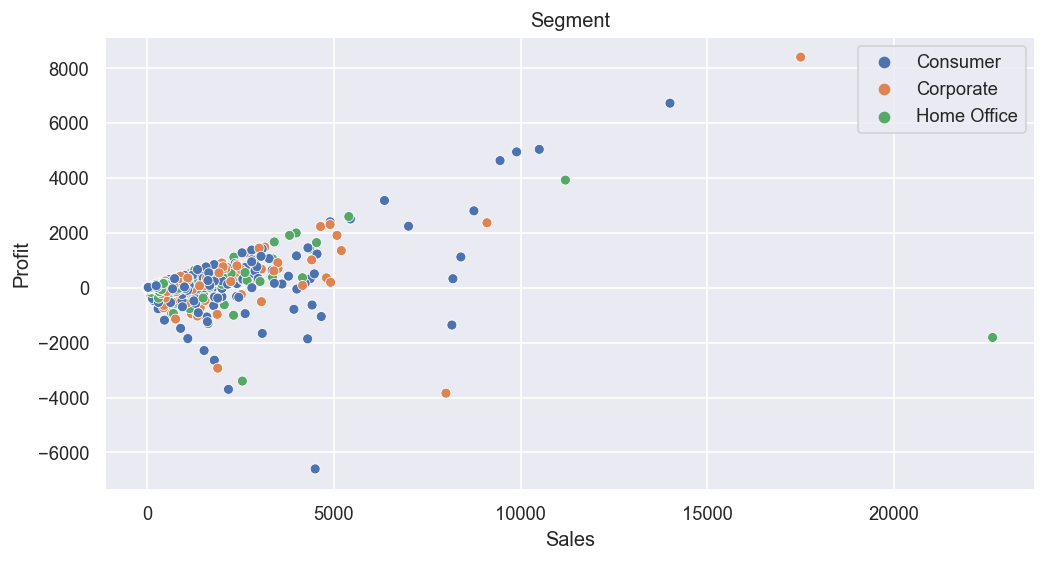

In [119]:
next(scate);

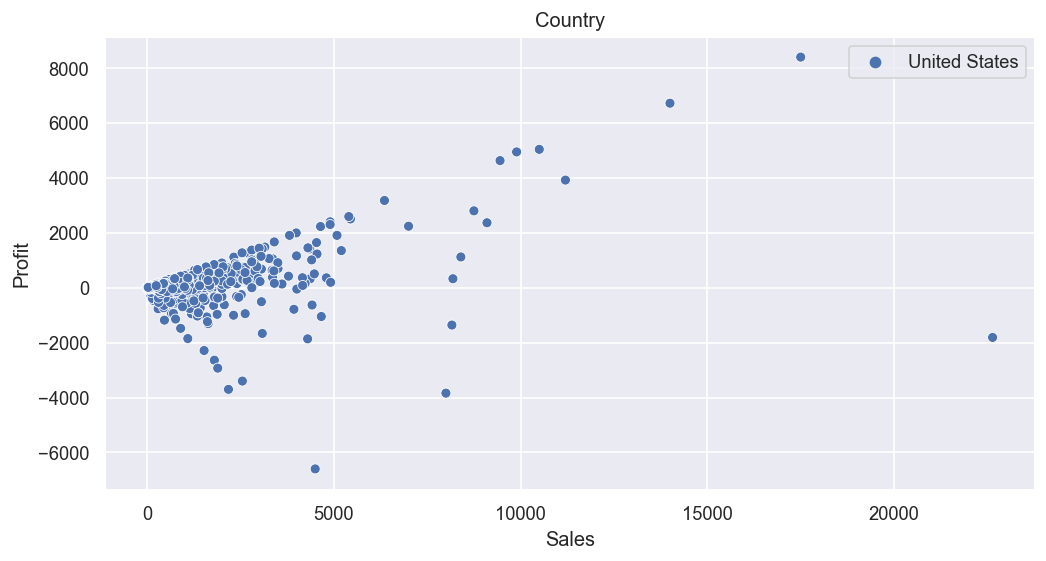

In [120]:
next(scate);

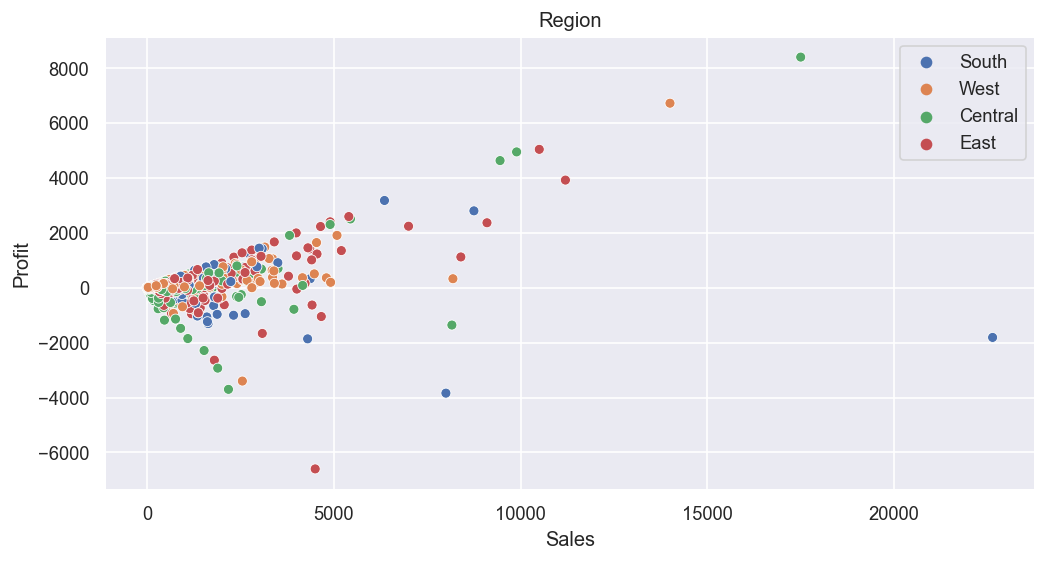

In [121]:
next(scate);

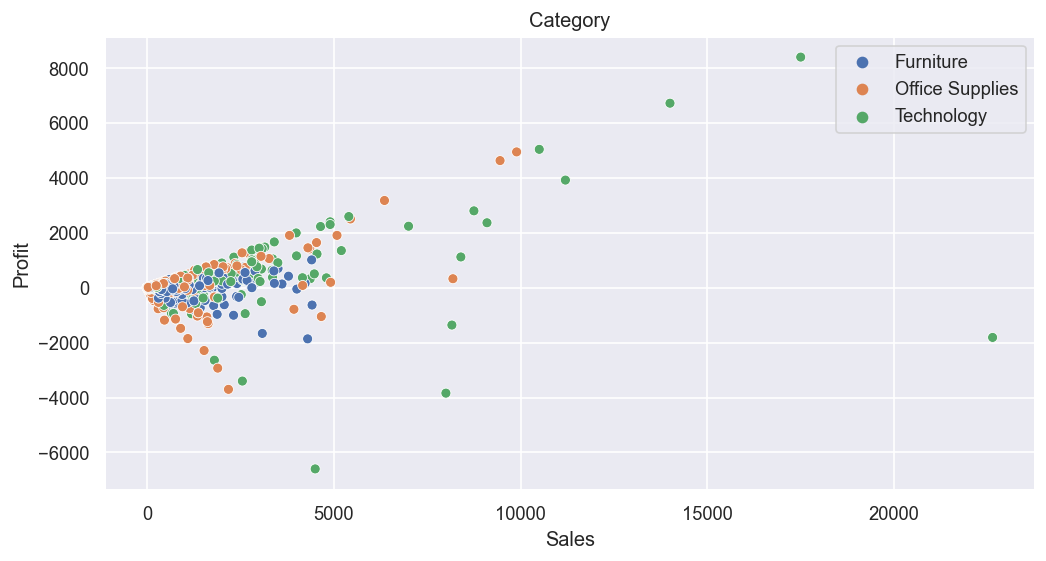

In [122]:
next(scate);

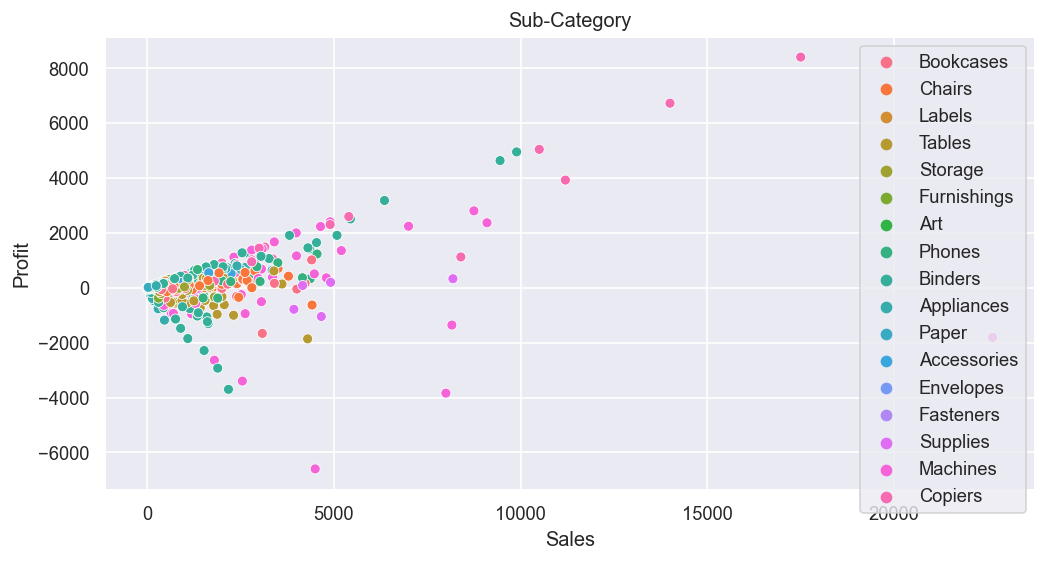

In [123]:
next(scate);

In [125]:
#The lowest Minimum Profit
df[df['Profit']==min(df.Profit)]

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,East,Technology,Machines,4499.985,5,0.7,-6599.978


>##### As we say the lowest profit (-6599.978) is at `Ohio` state in `Lanacaster` city at `Machines`
>##### The profit is negative and that means production costs are more than your total revenue for a specific period
>##### I think the reason is the Discount amout as it is 70% so it need to be less

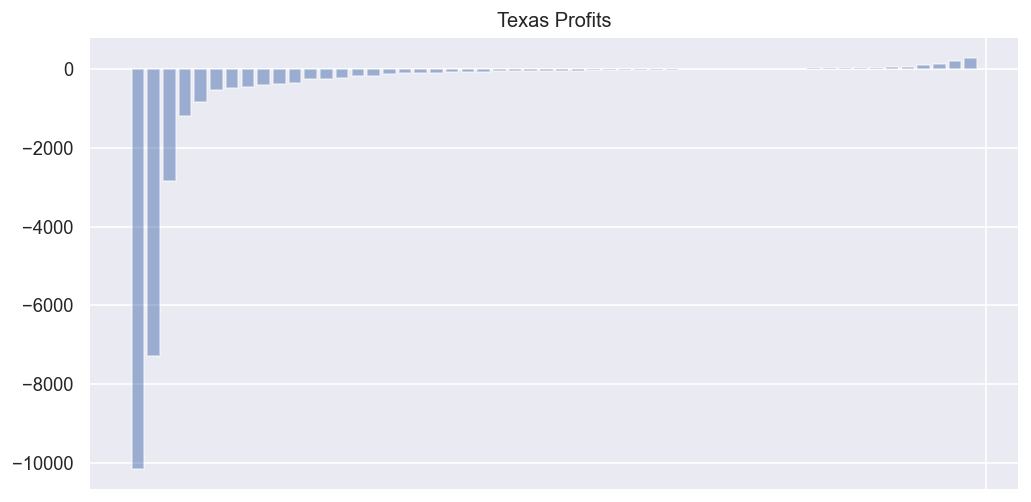

In [163]:
plt.figure(figsize=(10,5), dpi = 120)
z=df[df['State']=='Texas'].groupby('City')['Profit'].sum().sort_values()[:]
plt.bar(z.index,z.values, align='center', alpha=0.5,)
plt.xticks('');
plt.title('Texas Profits');

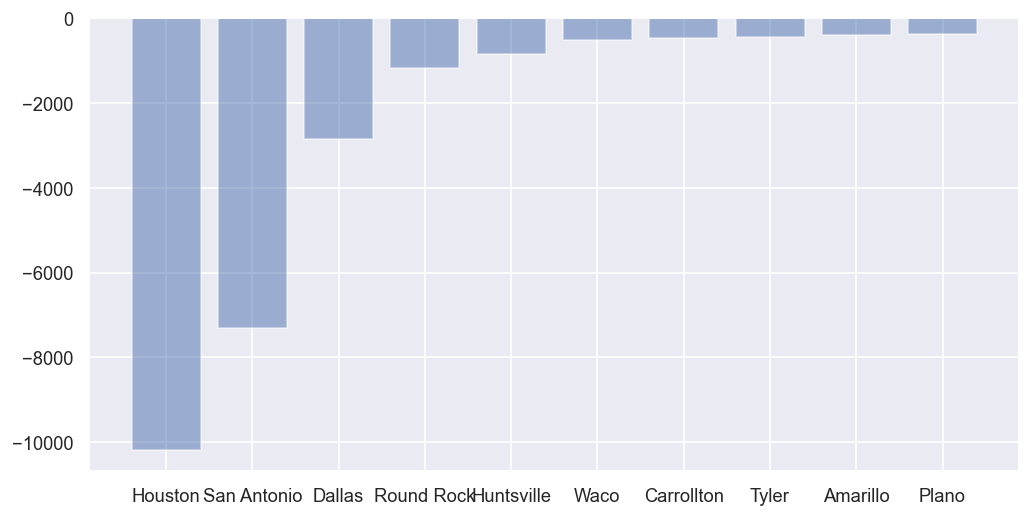

In [161]:
plt.figure(figsize=(10,5), dpi = 120)
z=df[df['State']=='Texas'].groupby('City')['Profit'].sum().sort_values()[:10]
plt.bar(z.index,z.values, align='center', alpha=0.5);

>### All Texas cities has the Negative Profit !!

<a id='conclusions'></a>

# Conclusions
1. ###### The `Standard Class` has the largest sell while `The Same Day` is the lowest.
2. ###### The `Consumer` is the most purchaser of merchandise.
3. ###### The Highest `Profit` is in `California` while in `Wyoming` is the lowest.
4. ###### The Most popular is The West Region unless West and East is too close to each other while the lowest is the South. 
5. ###### The largest sell Category is `Office Supplies` while `Technology` is The lowest and `Furniture` is close to it. 
6. ###### `Blinders` and `Paper` has the most Profit while the lowest is `Copiers`.
7. ###### `Sales` and `Profit` Has a high correlation compared by others 
8. ###### The lowest profit (-6599.978) is at `Ohio` state in `Lanacaster` city at `Machines`
###### The profit where negative and that means production costs are more than your total revenue for a specific period ## 
###### I think the reason is the Discount amout as it is 70% so it need to be less
9. ###### 90% of Texas City has negative Profit